## Result of exploratory set

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Identify targets

In [2]:
# define the drugs
drugs = ['Bafetinib', 'Abemaciclib', 'OTS964', 'CCT137690', 'Belumosudil']

### K562

In [3]:
# load the processed result
scores = pd.read_csv('results/PL_K562_F_scores.csv')
fold_changes = pd.read_csv('results/PL_K562_F_fold_changes.csv')

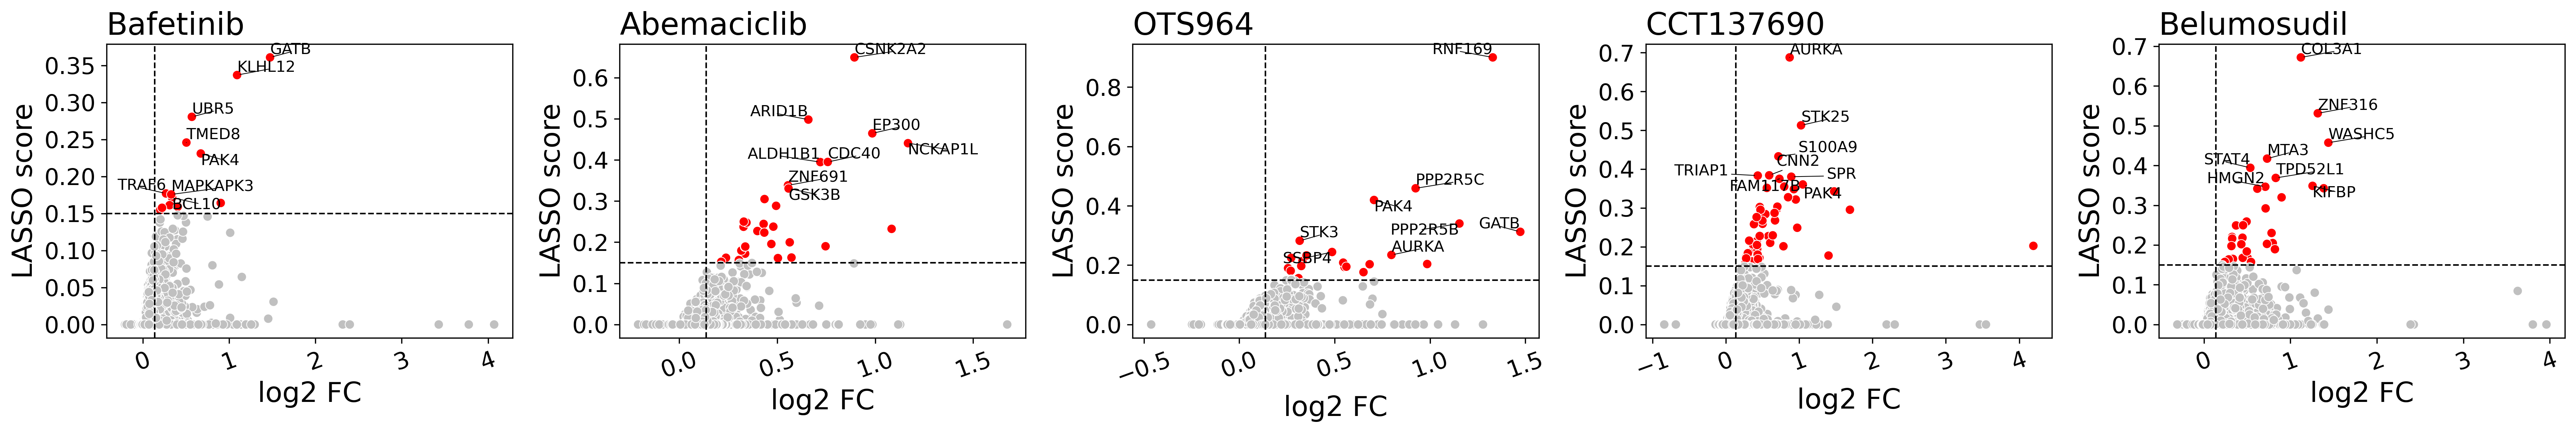

In [4]:
# plot the result
plt.figure(dpi = 300, figsize = (23.3, 4))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_results(d, scores, fold_changes, fc_thres = 1.1, score_thres=0.15, top_markers = 8)
plt.tight_layout()

### 293T

In [5]:
# load the processed result
scores = pd.read_csv('results/PL_293T_F_scores.csv')
fold_changes = pd.read_csv('results/PL_293T_F_fold_changes.csv')

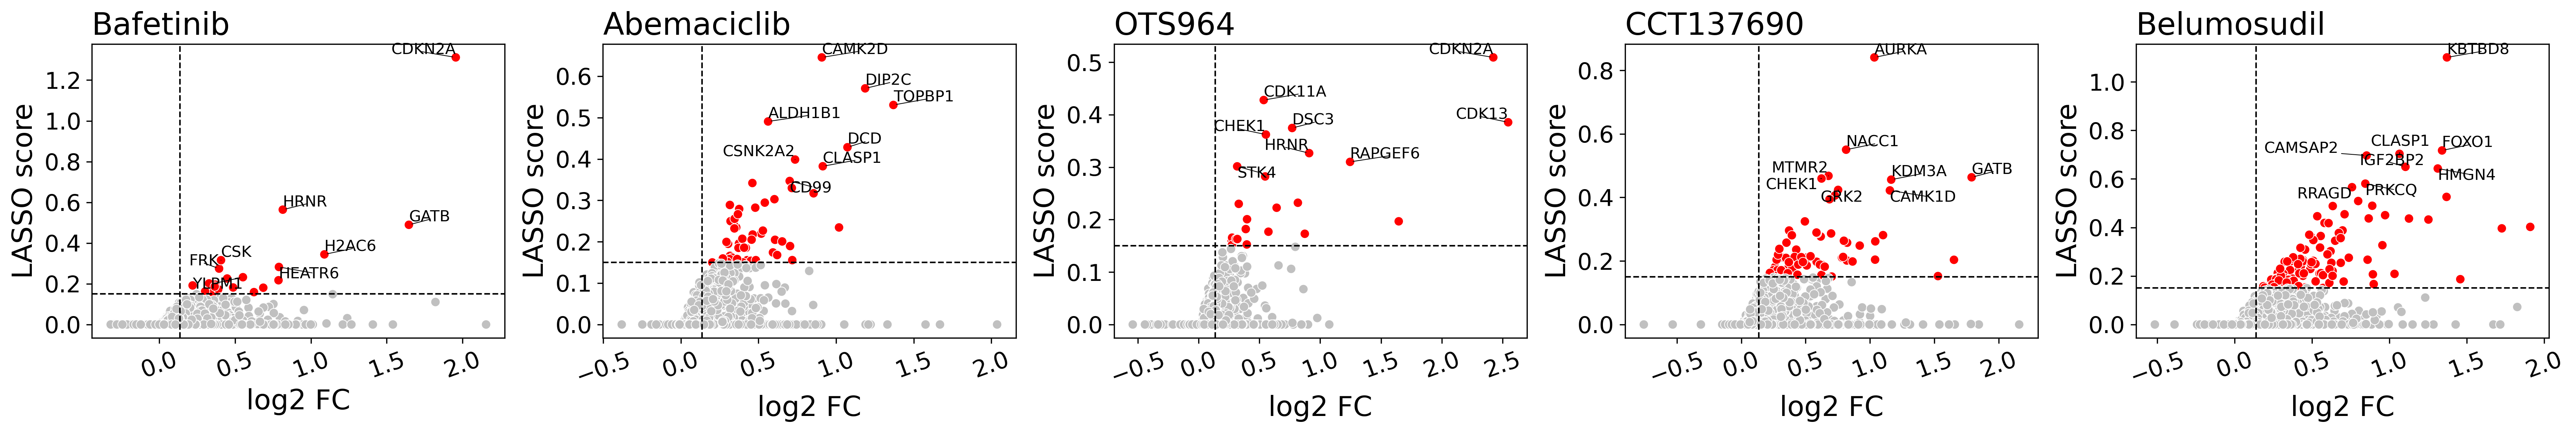

In [6]:
# plot the result
plt.figure(dpi = 300, figsize = (23.3, 4))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_results(d, scores, fold_changes, fc_thres = 1.1, score_thres=0.15, top_markers = 8)
plt.tight_layout()

### HepG2

In [7]:
# load the processed result
scores = pd.read_csv('results/PL_HepG2_F_scores.csv')
fold_changes = pd.read_csv('results/PL_HepG2_F_fold_changes.csv')

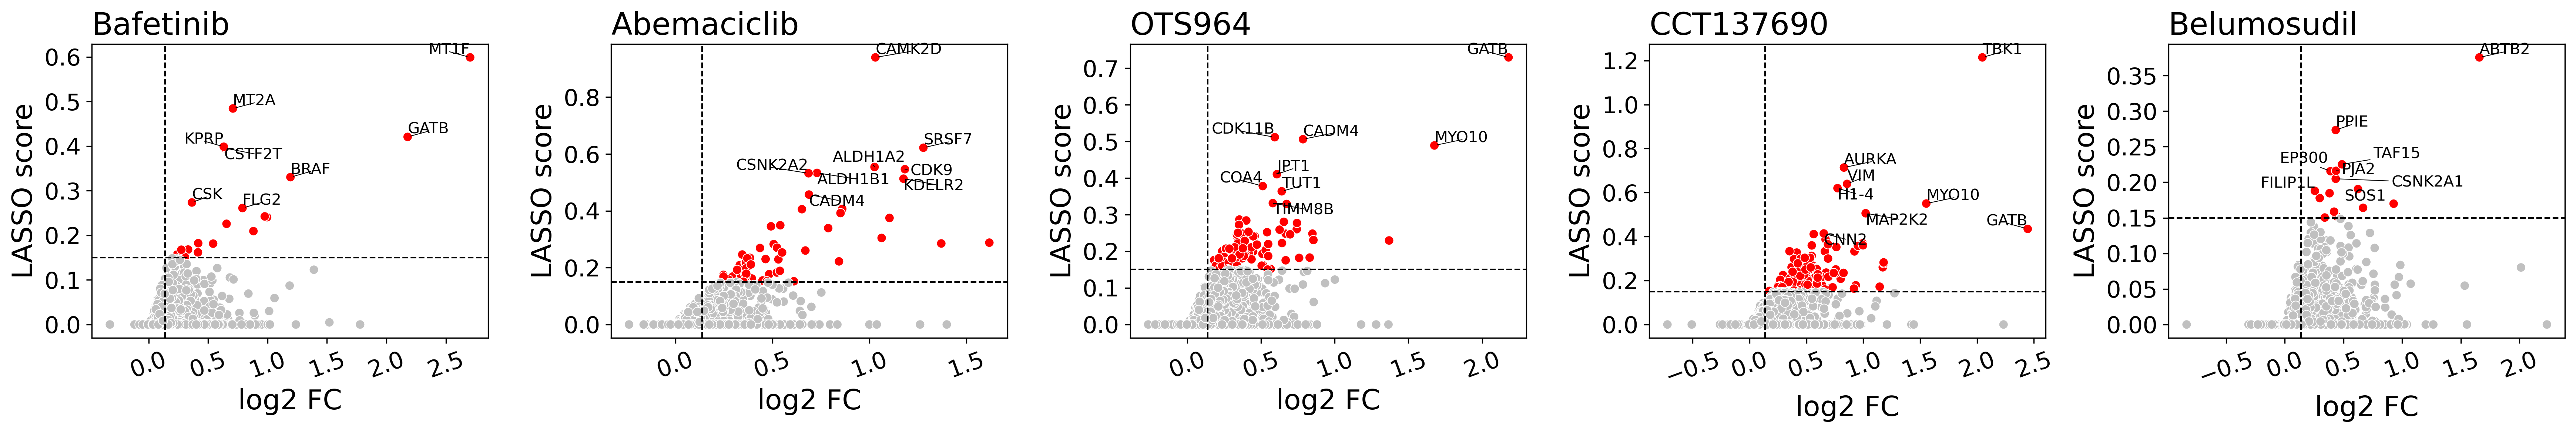

In [8]:
# plot the result
plt.figure(dpi = 300, figsize = (23.3, 4))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_results(d, scores, fold_changes, fc_thres = 1.1, score_thres=0.15, top_markers = 8)
plt.tight_layout()

### HCT116

In [9]:
# load the processed result
scores = pd.read_csv('results/PL_HCT116_F_scores.csv')
fold_changes = pd.read_csv('results/PL_HCT116_F_fold_changes.csv')

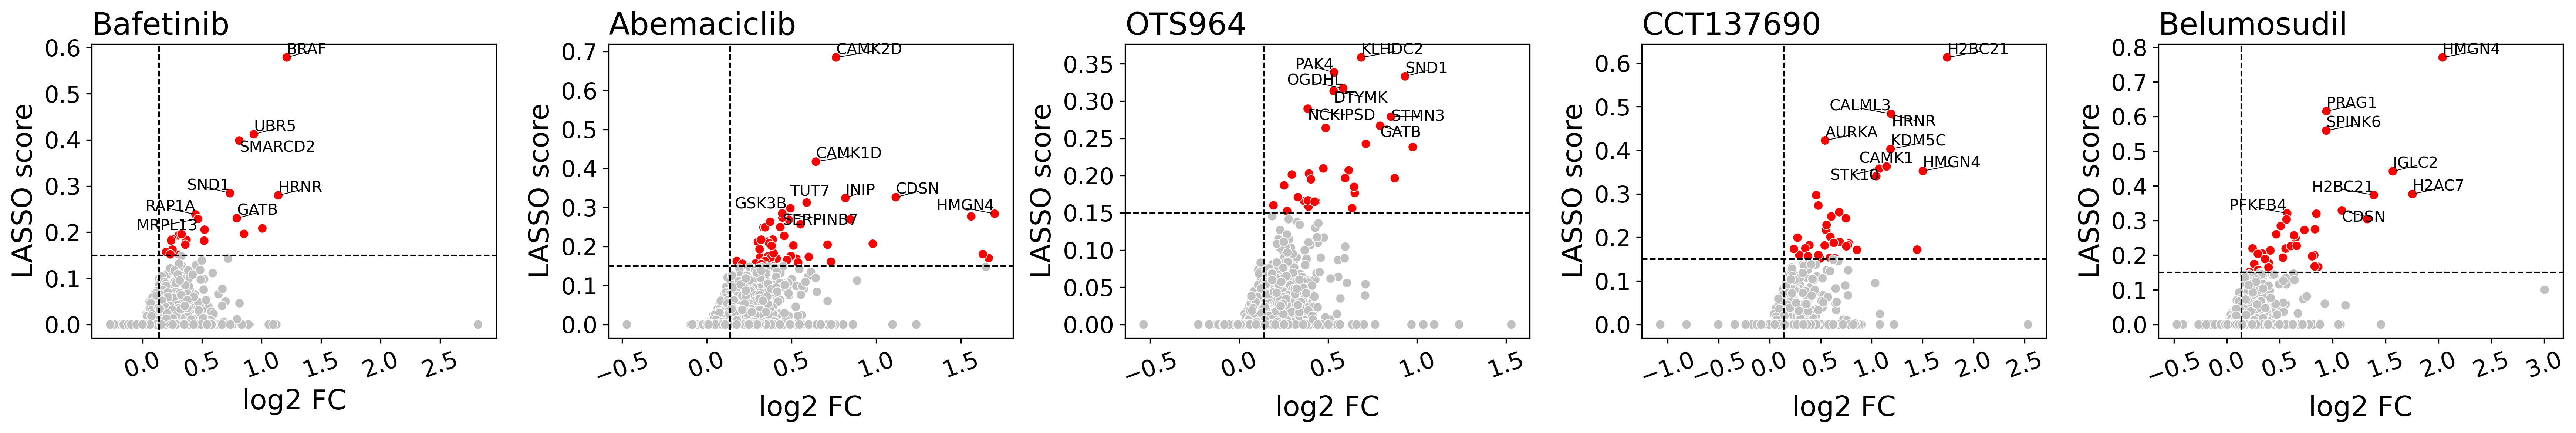

In [10]:
# plot the result
plt.figure(dpi = 300, figsize = (23.3, 4))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_results(d, scores, fold_changes, fc_thres = 1.1, score_thres=0.15, top_markers = 8)
plt.tight_layout()

### MCF7

In [11]:
# load the processed result
scores = pd.read_csv('results/PL_MCF7_F_scores.csv')
fold_changes = pd.read_csv('results/PL_MCF7_F_fold_changes.csv')

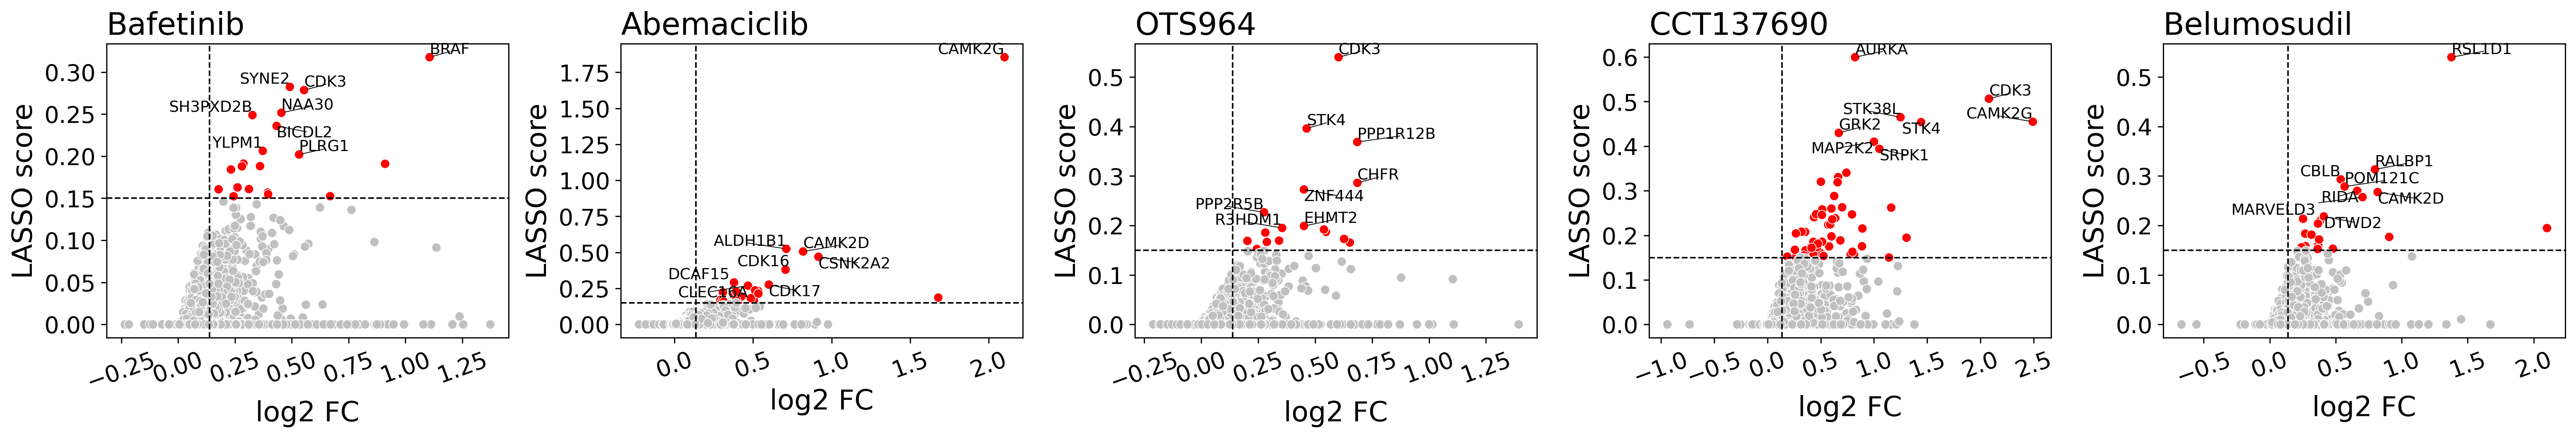

In [12]:
# plot the result
plt.figure(dpi = 300, figsize = (23.3, 4))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_results(d, scores, fold_changes, fc_thres = 1.1, score_thres=0.15, top_markers = 8)
plt.tight_layout()

### Network plot of identified targets in multi cell types

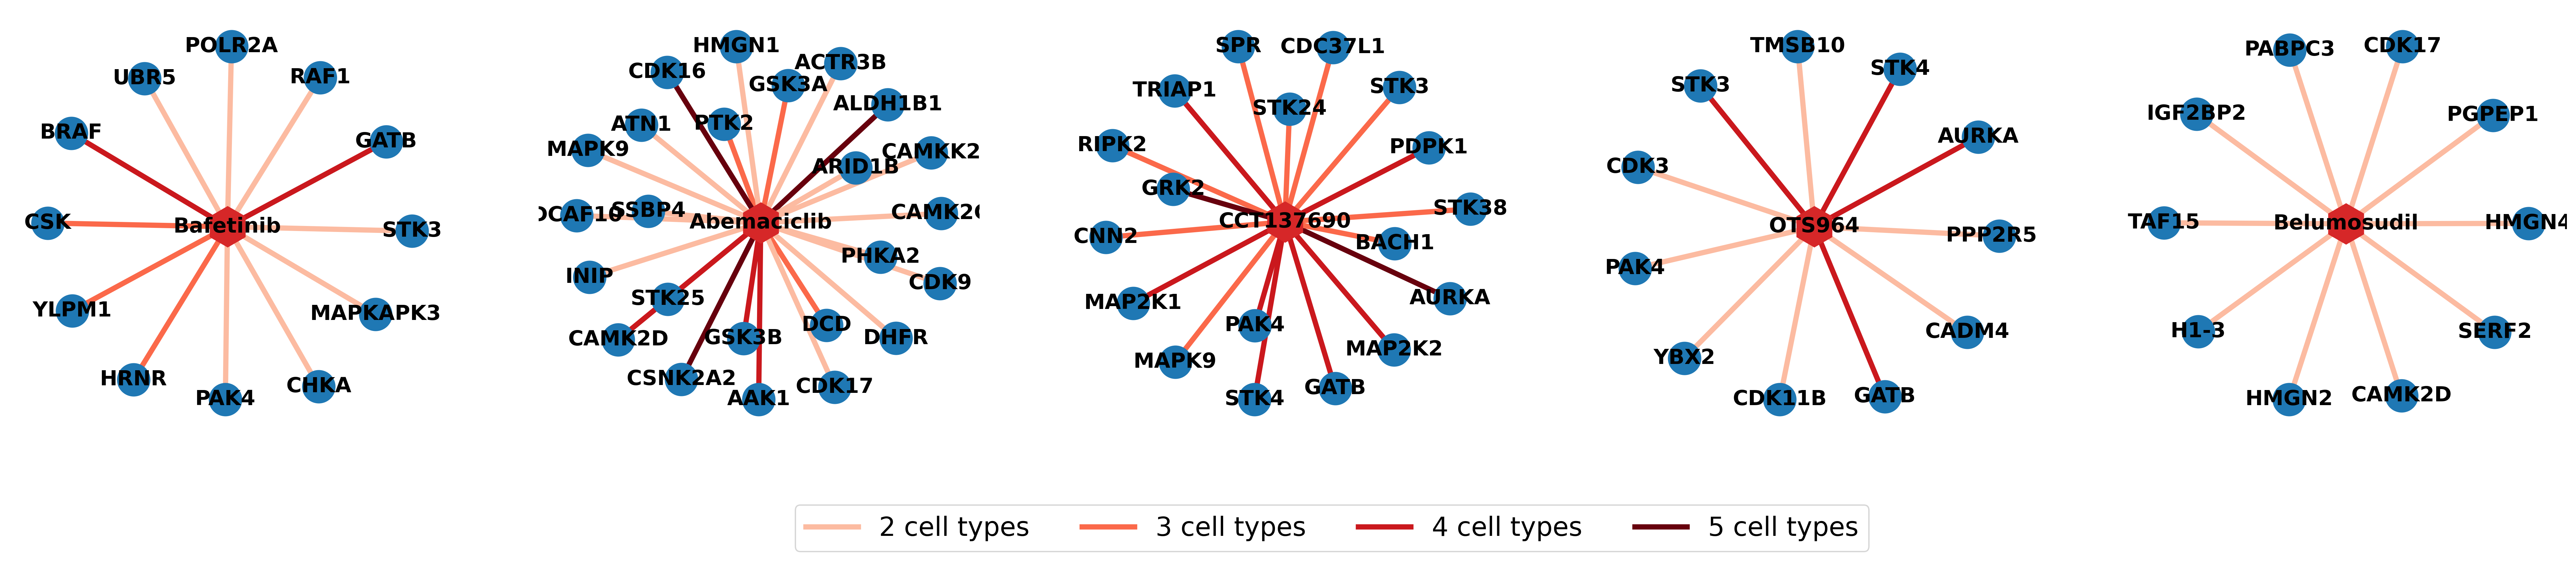

In [13]:
import matplotlib
import networkx as nx
from collections import Counter
from matplotlib.lines import Line2D

drugs = ['Bafetinib', 'Abemaciclib', 'CCT137690', 'OTS964', 'Belumosudil']
targets = ['BRAF', 'CSNK2A2', 'AURKA', 'CDK11B', 'ROCK2']

paths = [
    'results/PL_293T_F_scores.csv',
    'results/PL_HepG2_F_scores.csv',
    'results/PL_K562_F_scores.csv',
    'results/PL_HCT116_F_scores.csv',
    'results/PL_MCF7_F_scores.csv'
]


paths = [
    'results/PL_293T_F_scores.csv',
    'results/PL_HepG2_F_scores.csv',
    'results/PL_K562_F_scores.csv',
    'results/PL_HCT116_F_scores.csv',
    'results/PL_MCF7_F_scores.csv'
]

# find identified in each cell type
all_identified = []
for d in drugs:
    identified = []
    for f in paths:
        tab = pd.read_csv(f)
        sig = tab[tab[d] >= 0.15]['Gene Symbol'].values
        identified += list(sig)
    identified = dict(Counter(identified))
    if d == 'CCT137690':
        identified = {k: v for k, v in identified.items() if v >= 3}
    else:
        identified = {k: v for k, v in identified.items() if v >= 2}
    all_identified.append(identified)


# define network plot function
def plot_network(d, identified):
    n = len(identified)
    G = nx.star_graph(n)
    mapping = {0: d}
    for i, k in enumerate(identified):
        mapping[i + 1] = k
    colors = identified.values()
    G = nx.relabel_nodes(G, mapping)
    pos = nx.spring_layout(G)

    nx.draw(G, pos, edge_color=colors, width=4, edge_cmap=plt.cm.Reds, edge_vmin=1, edge_vmax=5,
            with_labels=True, font_weight='bold', node_size=600, font_size=16)
    nx.draw_networkx_nodes(G, pos, nodelist=[d], linewidths = 0.01, node_size=1000, node_shape='h', 
                           node_color="tab:red")
    

# plot the result
plt.figure(dpi = 300, figsize = (35, 6))
for i, d in enumerate(drugs):
    plt.subplot(1,5,1+i)
    plot_network(d, all_identified[i])
    
    norm = matplotlib.colors.Normalize(vmin=1, vmax=5)
    legend_colors = [plt.cm.Reds(norm(i))  for i in range(2,6)]
    legend_lines = [Line2D([0], [0], color=lc, lw=4) for lc in legend_colors]
plt.legend(legend_lines, ['{} cell types'.format(i) for i in range(2,6)], loc='lower center', 
           bbox_to_anchor=(-1.8,-0.3), ncol=12, fontsize = 20)
plt.tight_layout()

### Barplot of LASSO score and rank

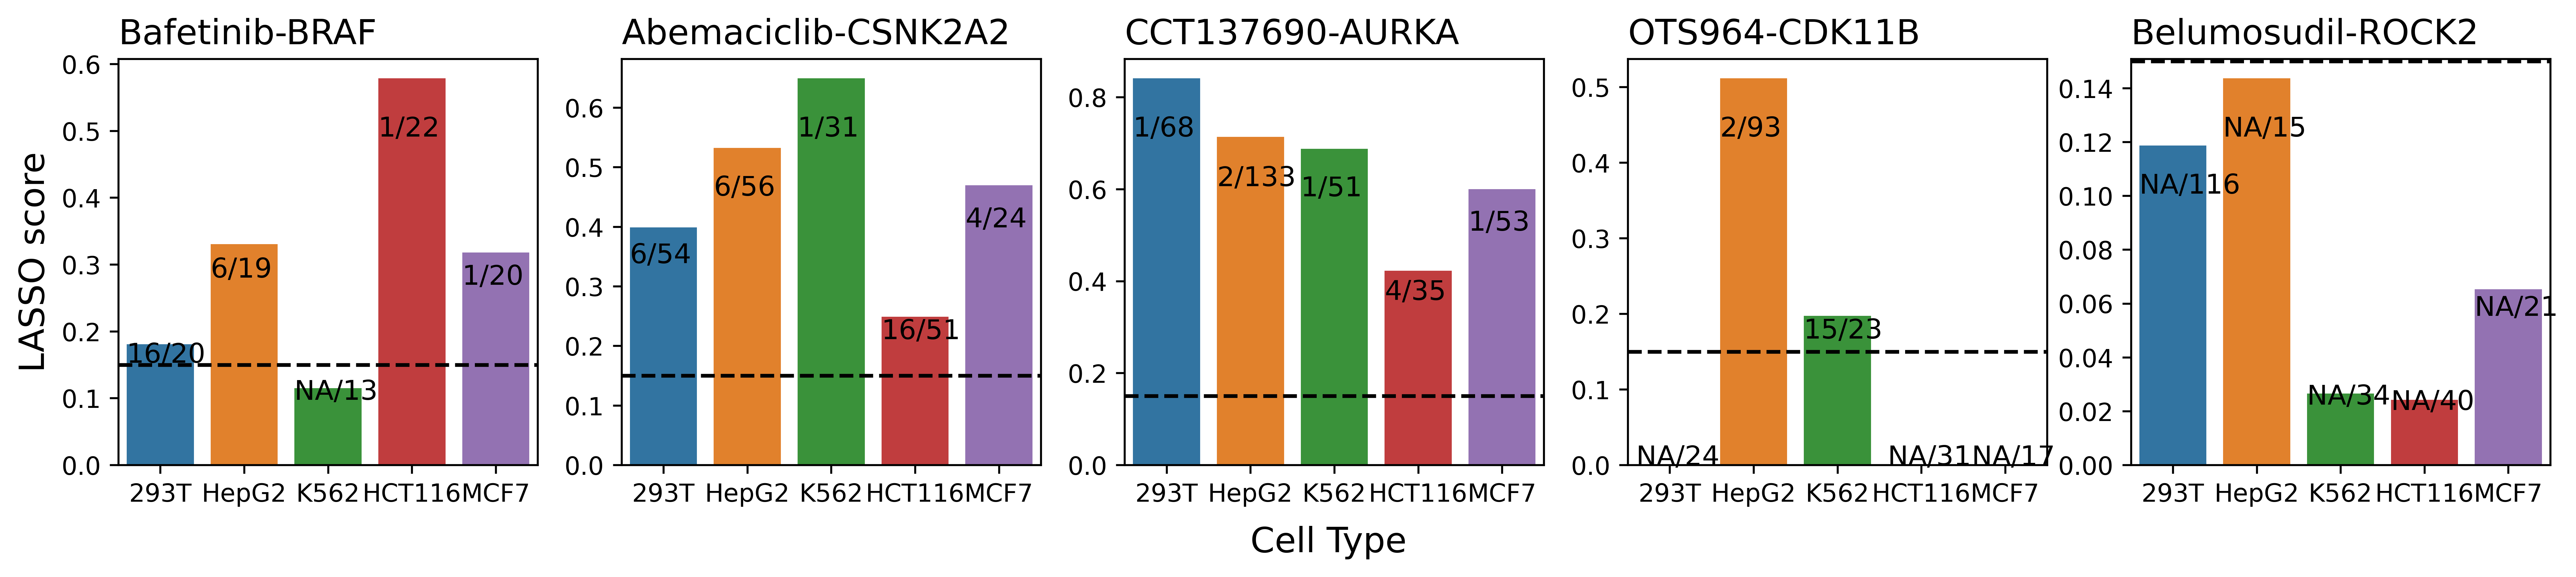

In [14]:
plt.figure(dpi = 600, figsize = (17.5, 3))
for i in range(len(drugs)):
    plt.subplot(1, 5, i+1)
    drug, target = drugs[i], targets[i]
    cells, values, ranks = [], [], []
    for f in paths:
        data = pd.read_csv(f)
        try:
            value = data.loc[data['Gene Symbol'] == target, drug].values[0]
        except:
            value = 0
        cell = f.split('_')[1]
        number = len(np.where(data.loc[:,drug] >= 0.15)[0])
        rank = len(np.where(data.loc[:,drug] >= value)[0])
        if rank > number:
            rank = 'NA/{}'.format(number)
        else:
            rank = '{}/{}'.format(rank, number)
        cells.append(cell)
        values.append(value)
        ranks.append(rank)
    sns.barplot(x=cells, y=values)
    for j, rank in enumerate(ranks):
        plt.text(j-0.4, 0.85*values[j], rank, fontsize = 11)
    plt.title('{}-{}'.format(drug, target), loc='left', fontsize = 14)
    plt.axhline(0.15, linestyle = '--', color = 'black')
    if i == 0:
        plt.ylabel('LASSO score', fontsize = 14)
        plt.text(13, -0.13, 'Cell Type', fontsize = 14)
plt.tight_layout()